In [54]:
import sys
import sklearn.cluster as cluster
from tqdm import tqdm
from numpy import ndarray
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
sns.set_context('paper')
sns.set_style('white')


# The code below gives a bare bones approach for getting the dendogram
# for part 3 of problem 1. You will need to write the dist functions that
# have been left blank and specify the remaining norms (either finding)
# an equivalent numpy function or writing your own function). The program
# will then output how the points merge at each step and the distance at which
# they merge.




def dist_min (cluster_1, cluster_2, norm):
    # Calculate the minimum distance between the two clusters.
    min_dist = np.inf
    for p1 in cluster_1:
        for p2 in cluster_2:
            n_dist = norm(p1 - p2)
            if n_dist<min_dist:
                min_dist = n_dist
    return min_dist


def dist_max (cluster_1, cluster_2, norm):
    # Calculate the maximum distance between the two clusters.
    max_dist = np.float('-inf')
    for p1 in cluster_1:
        for p2 in cluster_2:
            n_dist = norm(p1 - p2)
            if n_dist>max_dist:
                max_dist = n_dist
    return max_dist


def dist_centroid (cluster_1, cluster_2, norm):
    # Calculate the centroid distance between the two clusters.
    centroid_1 = np.mean(cluster_1, axis=0)
    centroid_2 = np.mean(cluster_2, axis=0)
    return norm(centroid_1 - centroid_2)


def dist_avg (cluster_1, cluster_2, norm):
    # Calculate the geometric average distance between the two clusters.
    G_G_prime = cluster_1.shape[0]*cluster_1.shape[1]
    total_dist = 0
    for point1 in cluster_1:
        for point2 in cluster_2:
            total_dist += norm(point1 - point2)
    return total_dist/G_G_prime


# l1_norm taken from numpy
l1_norm = lambda x:np.linalg.norm(x, ord=1)

# inf_norm taken from numpy

inf_norm = lambda x:np.linalg.norm(x, ord=np.inf)

norm_names = ["l2 norm", 'l1 norm', 'inf norm']
norms_list = [np.linalg.norm, l1_norm, inf_norm]

dist_names = ["min dist", 'max dist', 'avg dist', 'centroid dist']
dist_list = [dist_min, dist_max, dist_avg, dist_centroid]

In [57]:
def find_which_merge ():
    # Store which two clusters are the first to merge.
    df_clusters_merged = pd.DataFrame(columns=['norm', 'dist', 'clust1', 'clust2'])

    for norm_i in range(len(norms_list)):
        for dist_i in range(len(dist_list)):
            print("Using distance function " + str(dist_names[dist_i]) +
                  " and using norm " + str(norm_names[norm_i]))

            # Initialize clusters, points, and step.
            # Define our points and initial clusters.
            points = np.array(
                  [[[0.1, 0.5]], [[0.35, 0.75]], [[0.28, 1.35]], [[0, 1.01]]])
            cluster_1 = np.concatenate((points[0], points[1]))
            cluster_2 = points[2]
            cluster_3 = points[3]
            clusters = [cluster_1, cluster_2, cluster_3]
            step = 1

            # Continue until there is only one cluster left in our list of
            # clusters
            while len(clusters)>1:
                # Display current clusters.
                print("----------------------------------")
                print("Clusters at step {}:".format(step))
                for q, clust in enumerate(clusters):
                    print('Cluster {}:'.format(q + 1))
                    for p in clust:
                        print('\t{}'.format(p))

                step += 1
                min_dist = np.inf
                merge_i = -1
                merge_j = -1
                # Iterate through all the possible cluster pairs and test
                # distance.
                # Iterate through all the possible cluster pairs and test distance
                for i in range(len(clusters)):
                    for j in range(len(clusters)):
                        # If statement ensure i=j will not be tested
                        if i<j:
                            n_dist = dist_list[dist_i](
                                clusters[i],clusters[j],norms_list[norm_i])
                            if n_dist < min_dist:
                                # Record minimum distance and indices
                                min_dist = n_dist
                                merge_i = i
                                merge_j = j

                # Record which two clusters were first to merge.
                if step==2:  # 2 b/c of how they defined the first step
                    new_row = {'norm':str(norm_names[norm_i]),
                               'dist':str(dist_names[dist_i]),
                               'clust1':merge_i + 1,
                               'clust2':merge_j + 1}
                    df_clusters_merged = df_clusters_merged.append(new_row,
                                                           ignore_index=True)

                # Merge together clusters with the minimum distance.
                print('Merging together clusters:')
                print('{}: {}\t'.format(merge_i + 1, clusters[merge_i]))
                print('{}: {}\t'.format(merge_j + 1, clusters[merge_j]))

                clusters[merge_i] = np.concatenate((clusters[merge_i],
                                                    clusters[merge_j]), axis=0)
                del clusters[merge_j]
                print("Most recent merge distance " + str(min_dist))

            print("----------------------------------")
            print("Clusters at step" + str(step))
            for clust in clusters:
                print(list(clust))
    print("----------------------------------\n")
    return df_clusters_merged

In [58]:
find_which_merge()

Using distance function min dist and using norm l2 norm
----------------------------------
Clusters at step 1:
Cluster 1:
	[0.1 0.5]
	[0.35 0.75]
Cluster 2:
	[0.28 1.35]
Cluster 3:
	[0.   1.01]
Merging together clusters:
1: [[0.1  0.5 ]
 [0.35 0.75]]	
3: [[0.   1.01]]	
Most recent merge distance 0.4360045871318328
----------------------------------
Clusters at step 2:
Cluster 1:
	[0.1 0.5]
	[0.35 0.75]
	[0.   1.01]
Cluster 2:
	[0.28 1.35]
Merging together clusters:
1: [[0.1  0.5 ]
 [0.35 0.75]
 [0.   1.01]]	
2: [[0.28 1.35]]	
Most recent merge distance 0.44045431091090487
----------------------------------
Clusters at step3
[array([0.1, 0.5]), array([0.35, 0.75]), array([0.  , 1.01]), array([0.28, 1.35])]
Using distance function max dist and using norm l2 norm
----------------------------------
Clusters at step 1:
Cluster 1:
	[0.1 0.5]
	[0.35 0.75]
Cluster 2:
	[0.28 1.35]
Cluster 3:
	[0.   1.01]
Merging together clusters:
2: [[0.28 1.35]]	
3: [[0.   1.01]]	
Most recent merge distance 0

,norm,dist,clust1,clust2
0,l2 norm,min dist,1,3
1,l2 norm,max dist,2,3
2,l2 norm,avg dist,2,3
3,l2 norm,centroid dist,2,3
4,l1 norm,min dist,1,3
5,l1 norm,max dist,1,3
6,l1 norm,avg dist,1,3
7,l1 norm,centroid dist,1,3
8,inf norm,min dist,2,3
9,inf norm,max dist,2,3


In [2]:
def plot_unit_dist (norm, norm_name, min_frac=0.1):
    #Plot 2D vectors with norm <= 1.
    # https://glowingpython.blogspot.com/2011/04/plotting-p-norm-unit-circles
    #    -with.html
    
    N_SAMPLES = 5000
    points_used = 0  
    f = plt.figure()
    for _ in tqdm(range(N_SAMPLES)):
        # get a random vector.
        x = np.array([np.random.rand()*2 - 1, np.random.rand()*2 - 1])
        # check if point is in unit distance 
        if norm(x)<1:
            points_used += 1
            plt.plot(x[0], x[1], 'bo')

    frac_used = points_used/N_SAMPLES
    plt.axis([-1.2, 1.2, -1.2, 1.2])
    plt.xlabel('$x_1$', size=16)
    plt.ylabel('$x_2$', size=16)
    plt.title('{}'.format(norm_name), size=18)
    plt.show()

100%|██████████| 5000/5000 [00:09<00:00, 501.37it/s]


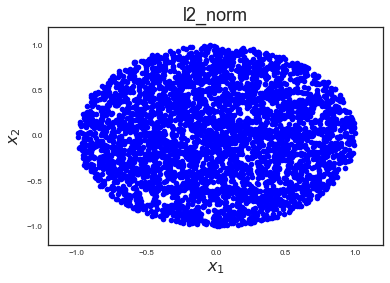

100%|██████████| 5000/5000 [00:05<00:00, 935.10it/s] 


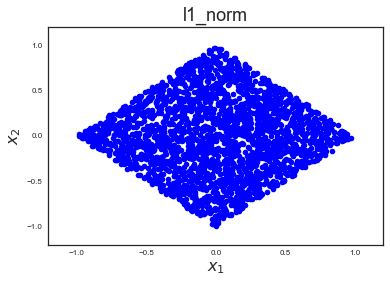

100%|██████████| 5000/5000 [00:15<00:00, 329.36it/s]


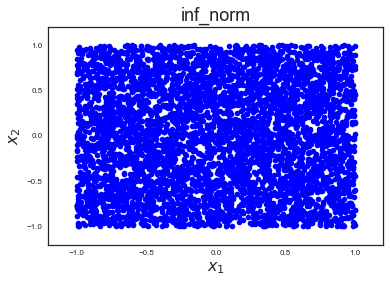

Using distance function min dist and using norm l2 norm
----------------------------------
Clusters at step 1:
Cluster 1:
	[0.1 0.5]
	[0.35 0.75]
Cluster 2:
	[0.28 1.35]
Cluster 3:
	[0.   1.01]
Merging together clusters:
1: [[0.1  0.5 ]
 [0.35 0.75]]	
3: [[0.   1.01]]	
Most recent merge distance 0.4360045871318328
----------------------------------
Clusters at step 2:
Cluster 1:
	[0.1 0.5]
	[0.35 0.75]
	[0.   1.01]
Cluster 2:
	[0.28 1.35]
Merging together clusters:
1: [[0.1  0.5 ]
 [0.35 0.75]
 [0.   1.01]]	
2: [[0.28 1.35]]	
Most recent merge distance 0.44045431091090487
----------------------------------
Clusters at step3
[array([0.1, 0.5]), array([0.35, 0.75]), array([0.  , 1.01]), array([0.28, 1.35])]
Using distance function max dist and using norm l2 norm
----------------------------------
Clusters at step 1:
Cluster 1:
	[0.1 0.5]
	[0.35 0.75]
Cluster 2:
	[0.28 1.35]
Cluster 3:
	[0.   1.01]
Merging together clusters:
2: [[0.28 1.35]]	
3: [[0.   1.01]]	
Most recent merge distance 0

In [71]:
if __name__ == '__main__':
	import sys
	import sklearn.cluster as cluster
	from tqdm import tqdm
	from numpy import ndarray
	import matplotlib.pyplot as plt
	import seaborn as sns

	import numpy as np
	import pandas as pd

	for i,norm in enumerate(norms_list):
		names = ['l2_norm', 'l1_norm', 'inf_norm']
		plot_unit_dist(norm,names[i])
	a = find_which_merge()
	print(a.iloc[:,:])

100%|██████████| 5000/5000 [00:10<00:00, 470.00it/s]


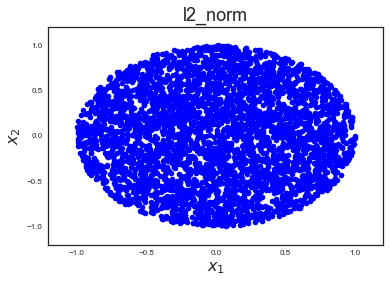

100%|██████████| 5000/5000 [00:04<00:00, 1040.94it/s]


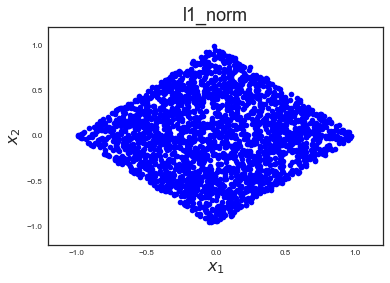

100%|██████████| 5000/5000 [00:13<00:00, 362.81it/s]


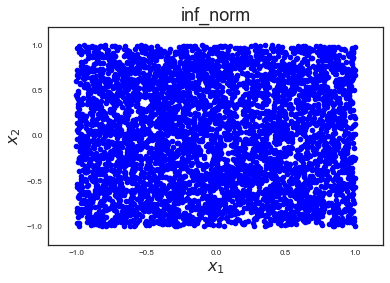

In [70]:

for i,norm in enumerate(norms_list):
    names = ['l2_norm', 'l1_norm', 'inf_norm']
    plot_unit_dist(norm,names[i])

100%|██████████| 5000/5000 [00:09<00:00, 536.25it/s]


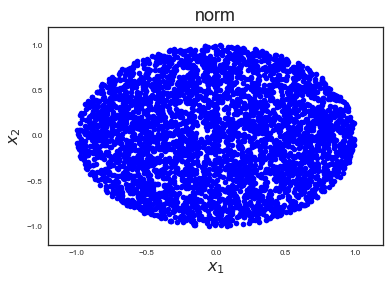

In [4]:
plot_unit_dist(np.linalg.norm,'norm')

In [3]:
def q3():
    from scipy.cluster.hierarchy import dendrogram, linkage
    points = np.array([[0.1, 0.5], [0.35, 0.75], [0.28, 1.35], [0, 1.01]])
    Z = linkage(points, method='single', metric=np.linalg.norm)
    fig = plt.figure(figsize=(25, 10))
    dn = dendrogram(Z)
    plt.show()


In [4]:
q3()

/Users/filipmichalsky/anaconda/lib/python3.6/site-packages/numpy/linalg/linalg.py:2249: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  (ord in ('f', 'fro') and ndim == 2) or


ValueError: The truth value of an array with more than one element is ambiguous. Use a.any() or a.all()